In [1]:
from nltk.tokenize import blankline_tokenize
import sys
import os
import nltk
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import nltk.corpus
from nltk.tokenize import word_tokenize
import re
from nltk.probability import FreqDist
from stop_words import get_stop_words
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import string

In [2]:

booklists = os.listdir("Data - Copy/")


def wordcloud(book):

    text = open('Data - Copy/'+book, mode="r",encoding="UTF-8").read()
    

    Alice_blank = blankline_tokenize(text)
    len(Alice_blank)

    i = ""

    j = ""
    match = ["START", "***", "GUTENBERG"]
    for i in range(len(Alice_blank)):
        if all(x in Alice_blank[i] for x in match):
            i = i+1
            break

    matches = ["END", "***", "GUTENBERG"]
    for j in range(len(Alice_blank)):
        if all(x in Alice_blank[j] for x in matches):
            j = j-1
            break

    Alices='\n'.join(Alice_blank[i:j])
    Alices=Alices.replace("_"," ")
    Alices=Alices.replace("[^a-zA-Z#]", " ")
    Alices=Alices.lower()

    text_clean=Alices.replace("─"," ")
    text_clean=text_clean.replace("┼"," ")
    text_clean=text_clean.replace("┬"," ")
    text_clean=text_clean.replace("┴"," ")
    text_clean=text_clean.replace("│"," ")
    text_nonum = re.sub(r'\d+', ' ', text_clean)


    wordings = text_nonum.split()
    stop_words = list(get_stop_words('en'))  
    stopwords= ['.', ',', "'", 'E', 'u','S', "n't","ll","re","gutenberg","gutenbergtm","much"] + list(STOPWORDS)+stop_words


    post_stop = [word for word in wordings if not word in stopwords]


    punctuation = re.compile(r'!"#$%&()*,-./:;<=>?[\]^_`{|}~[0-9]')

    post_punctuation = []
    for words in post_stop:
        word = punctuation.sub("", words)
        if len(word) > 1:
            post_punctuation.append(word)

    word_lem = WordNetLemmatizer()

    removepunc = str.maketrans('', '', string.punctuation)
    strippedpunc = [w.translate(removepunc) for w in post_punctuation]
    strippedpunc

    lemmatizetxt=[]

    for words in strippedpunc:
        lemmatizetxt.append(word_lem.lemmatize(words))

    resultz = pos_tag(lemmatizetxt)
    ResultFin=[s for s in resultz if s[1] != 'WP' and s[1] != 'WTD'and s[1] != 'WDT' and s[1] != 'IN'and s[1] != 'PRP' and s[1] != 'PRP$'  and s[1] != 'DT' and s[1] != 'CD']
    resulfinal=[x for (x,y) in ResultFin]


    new_lemmatizetxt = [item for item in resulfinal if not item.isdigit()]
    
    wt_words = new_lemmatizetxt
    
    data_analysis = nltk.FreqDist(wt_words)
 
    filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])

    fdist_top100 = FreqDist(filter_words).most_common(100)

    Result = []
    for key in fdist_top100:
        Result.append(key)
   
    
    Resultat = ','.join(str(v) for v in Result)

    Resultw = word_tokenize(Resultat)
    Resultw


    wc = WordCloud(background_color="white",
                   stopwords=stopwords,
                   width=900,
                   height=600)

    text = (" ").join(Resultw)

    wc.generate(text)
    booki=book.replace(".txt","")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file(booki+".png")

alice-in-wonderland


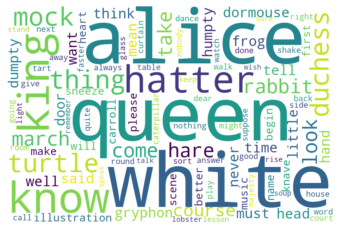

Among the Forest People


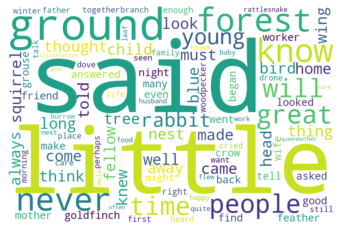

An Introductory Course of Quantitative Chemical Analysis


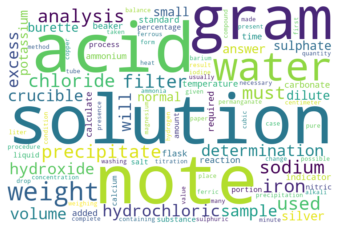

Curious Myths of the Middle Ages


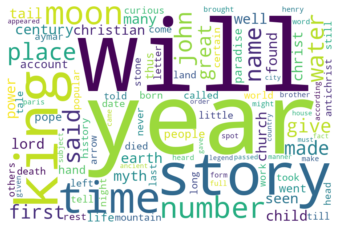

Democracy In America, Volume 1 (of 2)


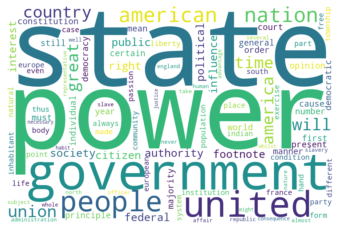

Experiments and Observations on Different


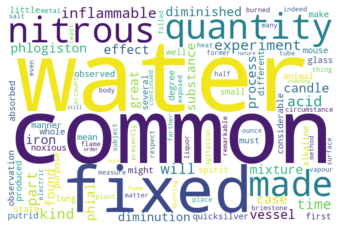

Formation of the Union, 1750-1829


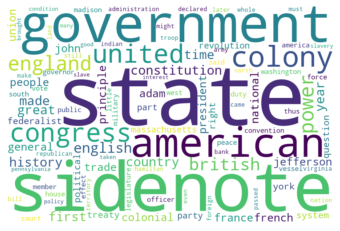

Histories of two hundred and fifty-one divisions of the German army which participated in the wa


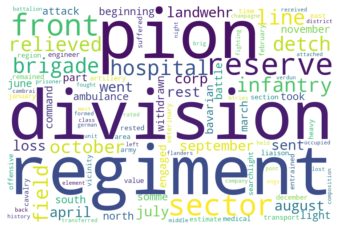

History of King Charles The First of England


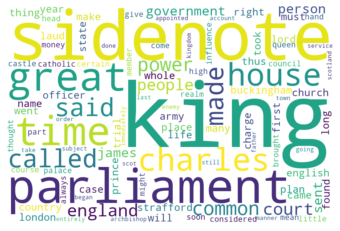

History of Phosphorus


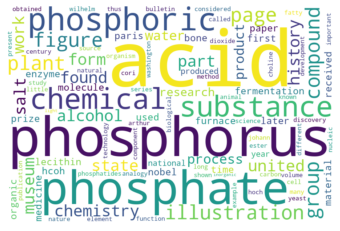

How the Flag Became Old Glory


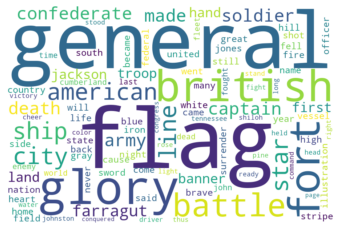

Little Lord Fauntleroy


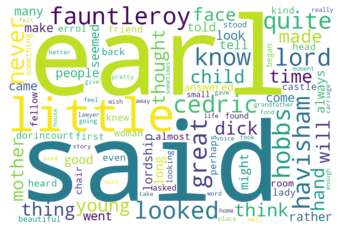

Medieval People


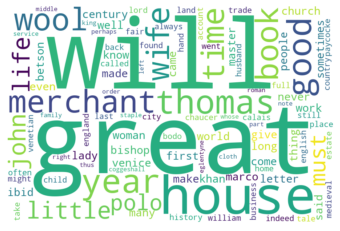

Mother Storie


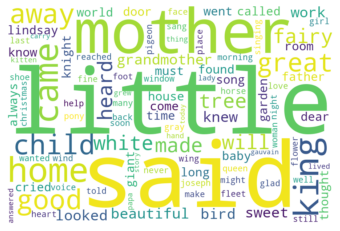

Narrative and Critical History of America


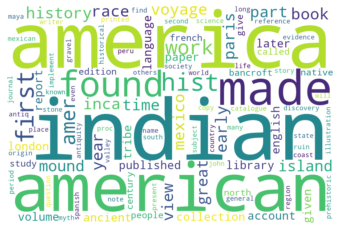

O Pioneers


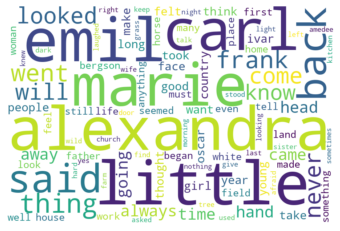

Peter-pan


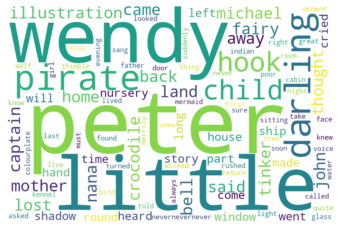

Prince Prigio


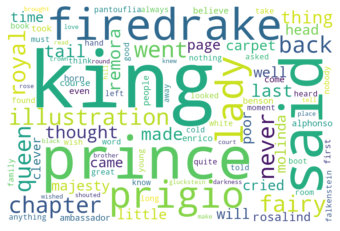

Sandman_s Goodnight Stories


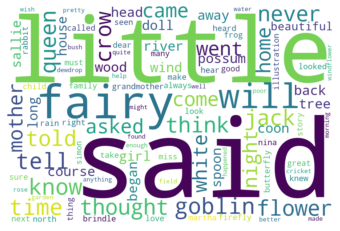

The Chemistry of Cookery


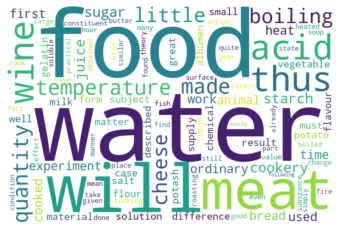

The Complete Herbal


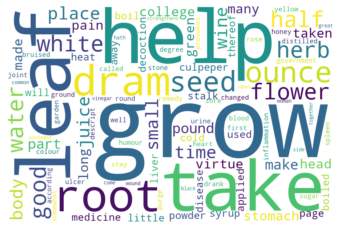

The Eighteenth Brumaire of Louis Bonaparte


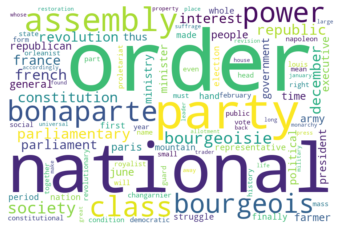

The Elements of Blowpipe Analysis


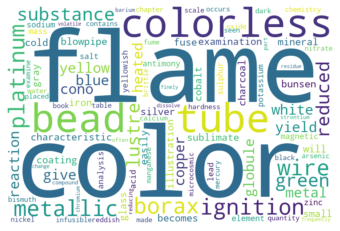

The fauna of the deep sea


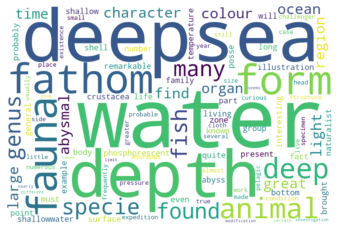

The Foundations of the Origin of Species


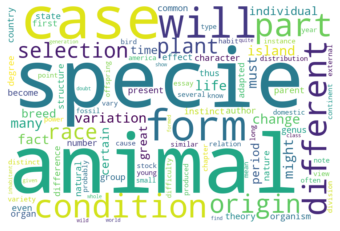

The French Revolution


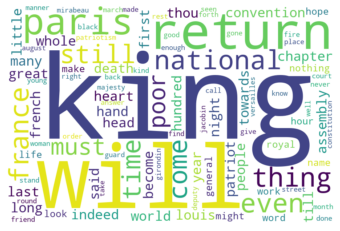

The Gases of the Atmosphere The History of Their Discovery by William Ramsay


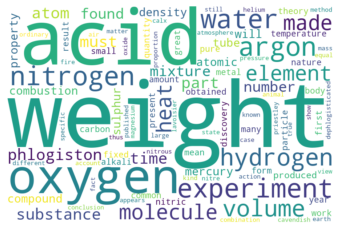

The Greater Republic


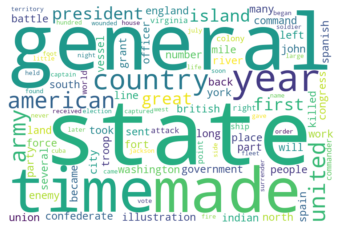

The Handbook of Soap Manufacture


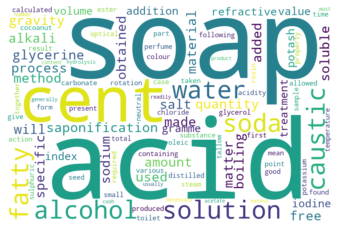

The History of England from the Accession of James II


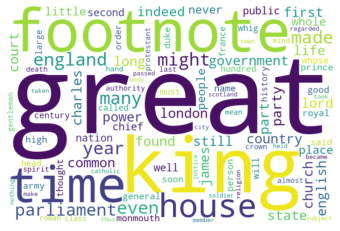

The History Of The Decline And Fall Of The Roman Empire


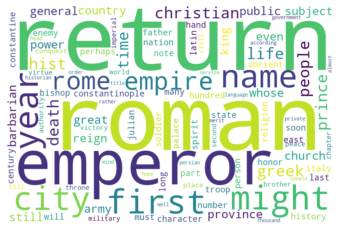

The Last Leaf


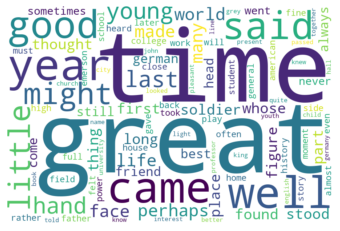

The Magic Fishbone


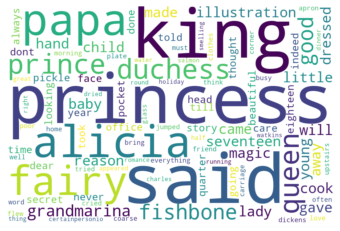

The Magic of Oz


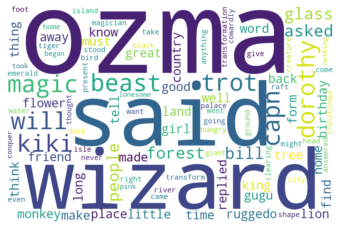

The Natural Food of Man


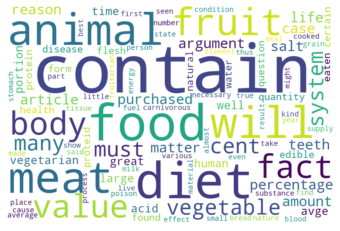

The Phase Rule and Its Applications


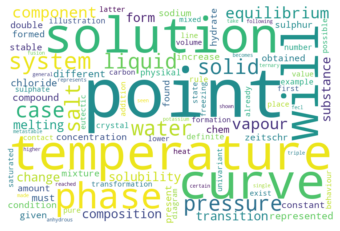

The Princess and the Goblin


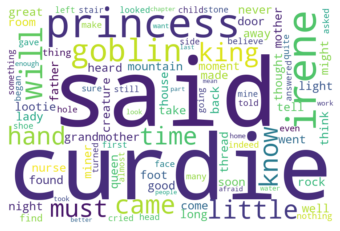

The Progress of Invention in the Nineteenth


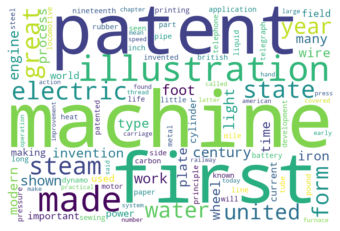

The Railway Children


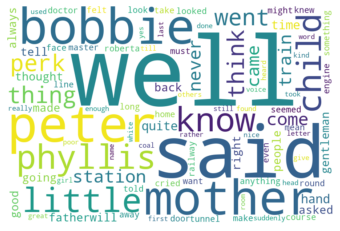

The Rose and the Ring


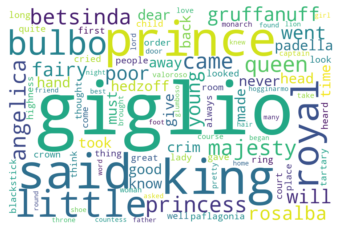

The Ruins


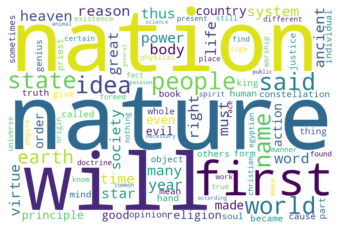

The Secret Garden


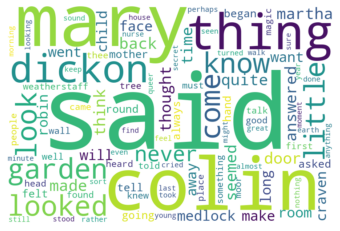

The Tale of Timmy Tiptoes


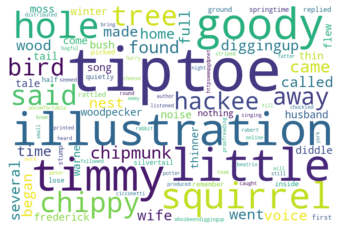

The Threefold Commonwealth


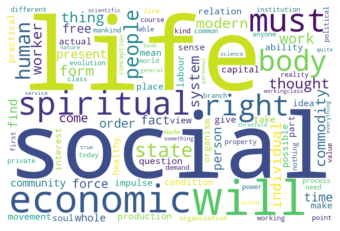

The Toxicity of Caffein An experimental study on different species of animals


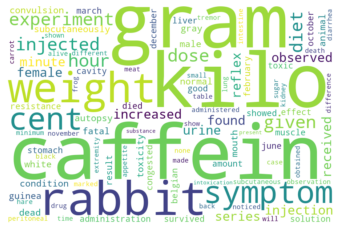

The United States of America Part I


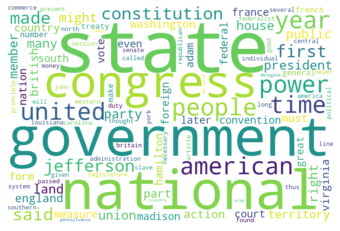

The White Feather


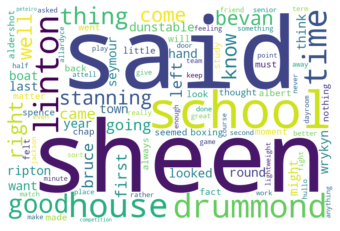

Three Minute Stories


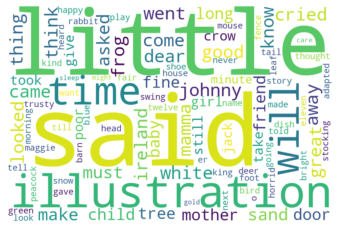

Through the Looking-Glass


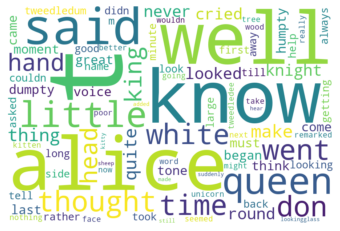

Tiger and Tom and Other Stories for Boys


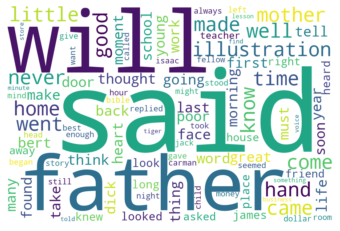

Tom Sawyer Abroad


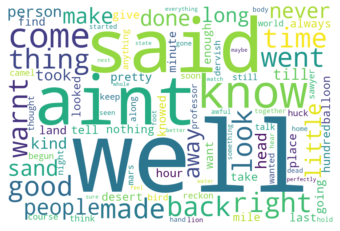

War and Peace


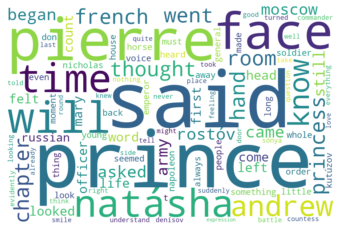

In [3]:

for book in booklists:
    cleanbook=book.replace(".txt","")
    print(cleanbook)
    wordcloud(book)
    